
<h2><center><font color='black'>   Taking a Deep-Learning Dive with Keras </font></center></h2>

open_placeholder_image

<img src='../imgs/neuron1.png' align='middle'/>


<img src='../imgs/linear1.png'/>

[Credits: Andrej Karpathy, Conv Neural Net class ](http://cs231n.github.io/linear-classify/)


<img src='../imgs/linear.png'/>
<img src='../imgs/cats_a.png'/>



<img src='imgs/linear2.png'/>


$$ Softmax:   f_j(z)={{{e^{z_j}}\above 1pt\sum_k e^{z_k}}}$$

$$ Cross Entropy:   L_i= -\sum_j t_j log(f_j(z))$$      
( Cross Entropy ~ Negative log probability for the right answer)


<img src='imgs/linear3.png'/>

<img src='imgs/linear4.png'/>

<img src='imgs/mnist_wt.png' align='middle'/>

<img src='imgs/xor.png' align='middle'/>

<img src='imgs/xor2.png'/>

<img src='imgs/convex.png'/>

<img src='imgs/non_convex.png'/>

<img src='imgs/backprop.png'/>
Credits: [mattmazur](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)

Let's focus on w5 how can we update this weight?

$$net_{o1}= h_{1}*w_5 + h_2*w_6+b$$  

$$out_{o1}= {{1}\above 1pt (1+e^{-net_{o1}})}$$

$$E_{total}= 1/2\sum(target-out)^2$$

How do we calculate : $${dE_{total}\above 1pt dw_5} ?$$ 



$${dE_{total}\above 1pt dout_{o1}}=2*1/2(target_{o1}-out_{o1}$$

$${dout_{o1}\above 1pt dnet_{o1}}=out_{o1}*(1-out{o1})$$

$${dnet_{o1}\above 1pt dw_{5}}=h_{1}$$


$${dE_{total}\above 1pt dw_5} = {dE_{total}\above 1pt dout_{o1}}{dout_{o1}\above 1pt dnet_{o1}}{dnet_{o1}\above 1pt dw_{5}}$$ 

<h1><center><font color='#F87217'> KERAS  </font></center></h1>

<h4><center><font color='black'> High-Level Deep Learning Library for Theano & Tensorflow  </font></center></h4>
 


Keras was developed to allow for fast deep-learning prototyping through the use of: 
 - user-friendliness
 - modularity
 - extensibility
 
Keras via Theano vs Keras via Tensorflow ? 
  - Comparable performance (for now), but Tensorflow will quickly pull ahead
  - We will start with Theano today

In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.utils.np_utils import to_categorical

from IPython.display import SVG
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import sys

Using TensorFlow backend.


In [2]:
import keras
keras.backend.set_image_data_format('channels_first')

### Let's get some data

In [3]:
sns.set_style('white')

iris=datasets.load_iris()
X=iris.data
y=iris.target

data=pd.DataFrame(X)
data['target']=y

In [4]:
data['name']=data.target.astype('str').replace({'0':'setosa','1':'versicolor','2':'virginica'})

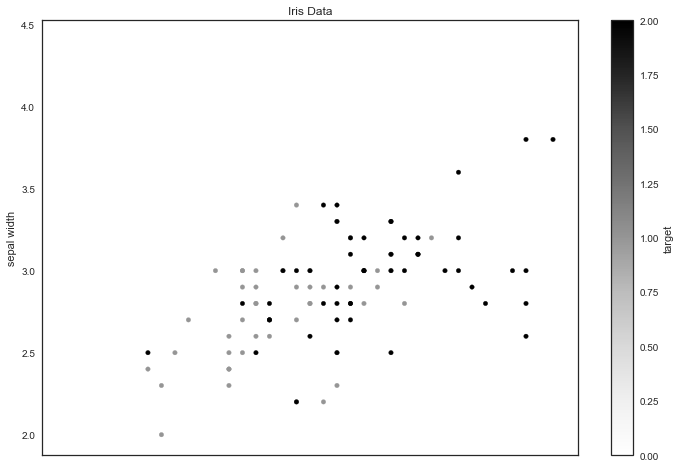

In [5]:
#ax=subplot(1,1,1)

plt.figure(figsize=(10,7));
ax=data.plot(kind='scatter',x=0,y=1,c='target',legend=False,figsize=(12,8));
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Iris Data');

## `Keras` Models
- The core objects in `Keras` are `Models` and `Layers`
- `Models` set up the container for your network
- `Layers` fill in the architecture (connections, unit types, activation functions, etc)
- The 2 options for `Models`:
  - `Sequential`: The basic one we'll focus on
  - Function API: Specify complex uncommon models
  
### The Sequential Model
- Allow you to stack all sorts of layers in your network
- Canvas on which you paint your beautiful network!

In [6]:
model=Sequential()  # Let's define our first Model.. 
model.add(Dense(units=3,input_dim=4))  # output: # classes,input: # of features
model.add(Activation("softmax"))

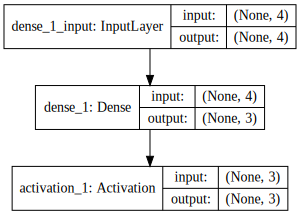

In [7]:
SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [8]:
# encode class values to integers
encoder=LabelEncoder()
encoder.fit(y)
enc_y=encoder.transform(y)
one_hot_y=to_categorical(enc_y)
one_hot_y[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [14]:
np.random.seed(123)  # reproducibility 

X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.33, random_state=42)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 0s 4ms/step - loss: 1.5777 - acc: 0.3400 - val_loss: 1.3396 - val_acc: 0.3200
Epoch 2/10
100/100 [==============================] - 0s 224us/step - loss: 1.2442 - acc: 0.3400 - val_loss: 1.0915 - val_acc: 0.3200
Epoch 3/10
100/100 [==============================] - 0s 273us/step - loss: 1.0267 - acc: 0.3400 - val_loss: 0.9381 - val_acc: 0.3400
Epoch 4/10
100/100 [==============================] - 0s 250us/step - loss: 0.9131 - acc: 0.4300 - val_loss: 0.8655 - val_acc: 0.7000
Epoch 5/10
100/100 [==============================] - 0s 258us/step - loss: 0.8698 - acc: 0.6500 - val_loss: 0.8375 - val_acc: 0.7000
Epoch 6/10
100/100 [==============================] - 0s 244us/step - loss: 0.8352 - acc: 0.6500 - val_loss: 0.8084 - val_acc: 0.7000
Epoch 7/10
100/100 [==============================] - 0s 221us/step - loss: 0.8105 - acc: 0.7000 - val_loss: 0.7841 - val_acc: 0.7800
Epoch 8/10
100/100 

###  So wait, what did we just do ?


### Let's try it again..

But first : let's do a quick install
https://github.com/fchollet/hualos

& run the app:

```
python api.py
```

In [10]:
model=Sequential()   # take two! 
model.add(Dense(units=64,input_dim=4))  # Note: we are making our network wider,
model.add(Activation("relu"))
model.add(Dense(units=32)) # We are making our network longer :)
model.add(Activation("relu"))
model.add(Dense(units=3))
model.add(Activation("softmax"))

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# adding early stopping (monitors val_loss)
cb_a=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
# lets look at our results while we are at it, RemoteMonitor allows us to stream events to a server
cb_b=keras.callbacks.RemoteMonitor(root='http://localhost:9000')

model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,callbacks=[cb_a,cb_b])

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 1s 6ms/step - loss: 7.8887 - acc: 0.3400 - val_loss: 7.7917 - val_acc: 0.3200
Epoch 2/10
100/100 [==============================] - 0s 432us/step - loss: 6.5717 - acc: 0.3400 - val_loss: 7.2250 - val_acc: 0.3200
Epoch 3/10
100/100 [==============================] - 0s 447us/step - loss: 6.1511 - acc: 0.3400 - val_loss: 6.8814 - val_acc: 0.3200
Epoch 4/10
100/100 [==============================] - 0s 325us/step - loss: 5.7578 - acc: 0.3400 - val_loss: 6.6498 - val_acc: 0.3200
Epoch 5/10
100/100 [==============================] - 0s 298us/step - loss: 5.5445 - acc: 0.3400 - val_loss: 6.5549 - val_acc: 0.3200
Epoch 6/10
100/100 [==============================] - 0s 334us/step - loss: 5.4787 - acc: 0.3400 - val_loss: 6.5954 - val_acc: 0.3000
Epoch 7/10
100/100 [==============================] - 0s 310us/step - loss: 5.5421 - acc: 0.3500 - val_loss: 6.6447 - val_acc: 0.3000


###  What can be gained by making the network wider & deeper?   

 -  A sufficiently wide neural net can approximate any reasonable function
 -  A deep network can be quite good at generalization
 
 <img src='imgs/VGG.png'/>

##  Code-Along
#### Objective: 
- Continue working with the Iris dataset, build another model that improves the accuracy further.
- Experiment with differnt [optimizers!](https://keras.io/optimizers/)
- Try to get > .95 accuracy.

In [19]:
model=Sequential()   # take three
model.add(Dense(units=128,input_dim=4)) 
model.add(Activation("relu"))
model.add(Dense(units=64)) 
model.add(Activation("relu"))
model.add(Dense(units=64)) 
model.add(Activation("relu"))
model.add(Dense(units=32)) 
model.add(Activation("relu"))
model.add(Dense(units=3))
model.add(Activation("softmax"))

In [20]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

# adding early stopping (monitors val_loss)
cb_a=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
# lets look at our results while we are at it
cb_b=keras.callbacks.RemoteMonitor(root='http://localhost:9000')

model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,callbacks=[cb_a,cb_b])

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 1s 5ms/step - loss: 1.2105 - acc: 0.3000 - val_loss: 0.9518 - val_acc: 0.7000
Epoch 2/10
100/100 [==============================] - 0s 390us/step - loss: 0.9913 - acc: 0.4400 - val_loss: 2.3280 - val_acc: 0.3000
Epoch 3/10
100/100 [==============================] - 0s 468us/step - loss: 1.4369 - acc: 0.3000 - val_loss: 0.7689 - val_acc: 0.6800
Epoch 4/10
100/100 [==============================] - 0s 651us/step - loss: 0.9008 - acc: 0.4600 - val_loss: 0.6436 - val_acc: 0.7000
Epoch 5/10
100/100 [==============================] - 0s 405us/step - loss: 0.6431 - acc: 0.6500 - val_loss: 0.4279 - val_acc: 0.6800
Epoch 6/10
100/100 [==============================] - 0s 448us/step - loss: 0.4681 - acc: 0.6800 - val_loss: 0.4058 - val_acc: 0.7000
Epoch 7/10
100/100 [==============================] - 0s 359us/step - loss: 1.1133 - acc: 0.6400 - val_loss: 10.9603 - val_acc: 0.3200
Epoch 8/10
100/100

In [32]:
model=Sequential()   # take four
model.add(Dense(units=128,input_dim=4)) 
model.add(Activation("relu"))
model.add(Dense(units=64)) 
model.add(Activation("relu"))
model.add(Dense(units=64)) 
model.add(Activation("relu"))
model.add(Dense(units=32)) 
model.add(Activation("relu"))
model.add(Dense(units=3))
model.add(Activation("softmax"))

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# adding early stopping (monitors val_loss)
cb_a=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
# lets look at our results while we are at it
cb_b=keras.callbacks.RemoteMonitor(root='http://localhost:9000')

model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,callbacks=[cb_a,cb_b])

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 1s 12ms/step - loss: 1.0181 - acc: 0.5200 - val_loss: 0.9584 - val_acc: 0.4800
Epoch 2/10
100/100 [==============================] - 0s 445us/step - loss: 0.9368 - acc: 0.5700 - val_loss: 0.8558 - val_acc: 0.6800
Epoch 3/10
100/100 [==============================] - 0s 384us/step - loss: 0.8717 - acc: 0.6500 - val_loss: 0.8031 - val_acc: 0.7000
Epoch 4/10
100/100 [==============================] - 0s 345us/step - loss: 0.8290 - acc: 0.6500 - val_loss: 0.7312 - val_acc: 0.7000
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 0.7513 - acc: 0.6500 - val_loss: 0.6512 - val_acc: 0.7000
Epoch 6/10
100/100 [==============================] - 0s 568us/step - loss: 0.6841 - acc: 0.6500 - val_loss: 0.5784 - val_acc: 0.8200
Epoch 7/10
100/100 [==============================] - 0s 324us/step - loss: 0.6038 - acc: 0.9200 - val_loss: 0.5464 - val_acc: 0.7600
Epoch 8/10
100/100 [

In [34]:
# compare with adam with sgd? 



## A word about optimization: 
Keras will perform parameter updates via the optimization on a batch by batch basis.

- **SGD**: Learning rate is constant (default setting)   

- we can set decay: to develop a time-based **decay**

- we can set **momentum:**  some fraction of the previous update is added to the current update, so that repeated updates in a particular direction compound (allows us to move faster in some direction)

- **Adagrad**:  Weights that receive smaller or less frequent updates will have an increased learning rate (more frequently updated parameters will receive a smaller learning rate increase)    

- **Adam (Adaptive Moment Estimation): Adagrad + Momentum **    
